In [1]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [3]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [4]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m))) * (1 / var)
    w_ = ss @ X.T @ Y
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [5]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.01018788052858868


In [6]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


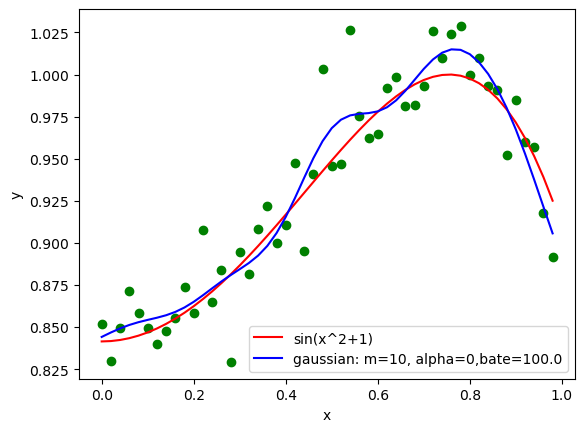

w:  [ 0.82967716  0.02655849 -0.01756601  0.06726679 -0.04177446  0.14747121
 -0.01422932  0.11325222  0.06280741  0.08442519]


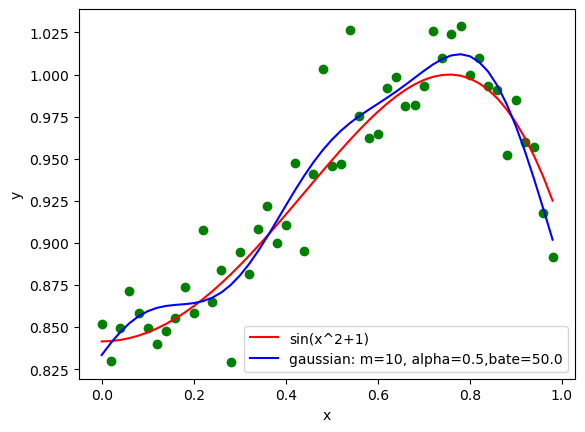

w:  [ 0.75893672  0.10194231 -0.02604151  0.0365824   0.03304778  0.09767643
  0.04928551  0.03743875  0.11690563  0.09859167]


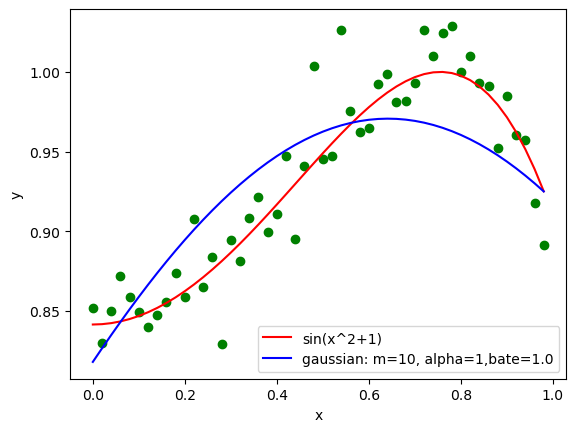

w:  [0.1140165  0.01480624 0.03498069 0.05624817 0.07803931 0.09973933
 0.12071685 0.14035438 0.15807853 0.17338775]


In [7]:
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)
params = [(0.01, 0), (0.02, 0.5), (1, 1)]

for var, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



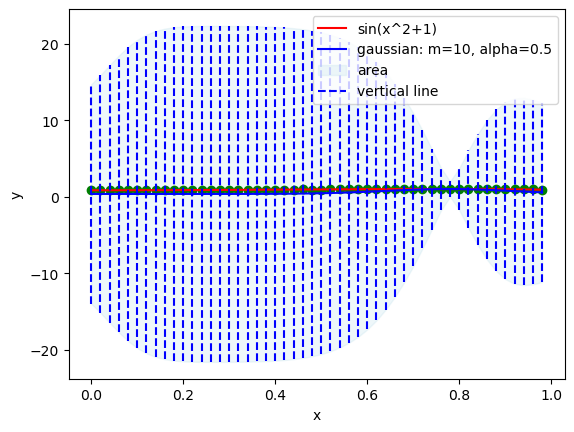

[39]
1


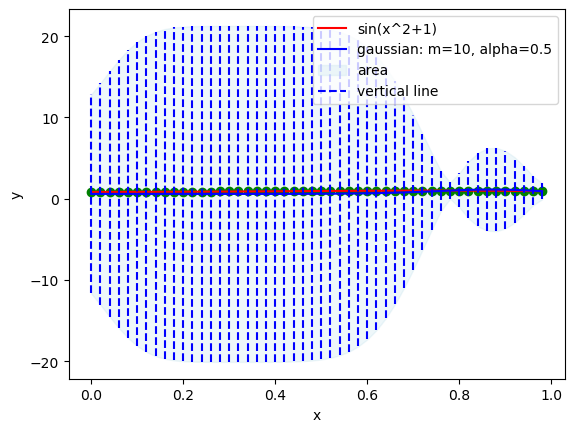

[39, 49]
2


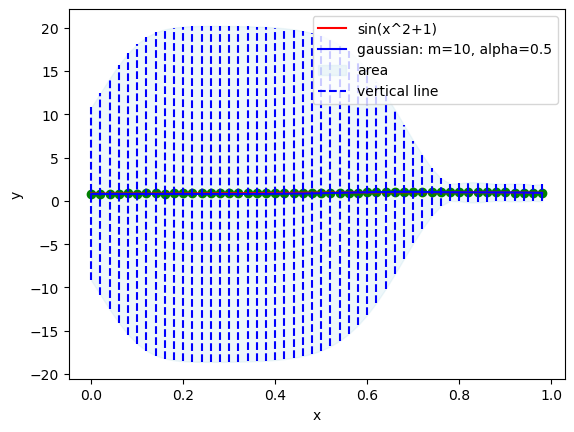

[39, 49, 44]
3


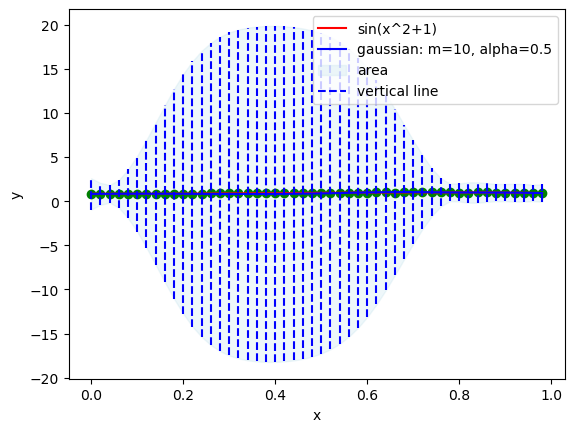

[39, 49, 44, 2]
4


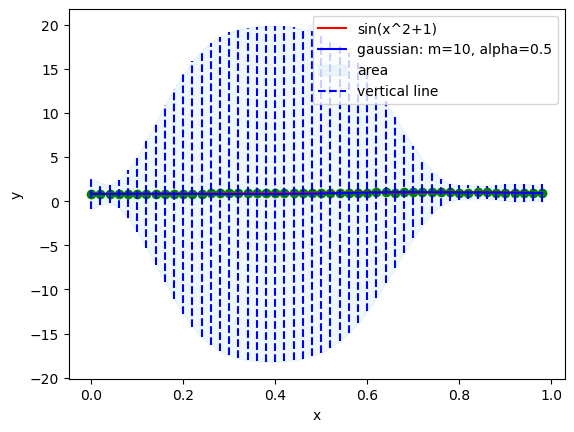

[39, 49, 44, 2, 42]
5


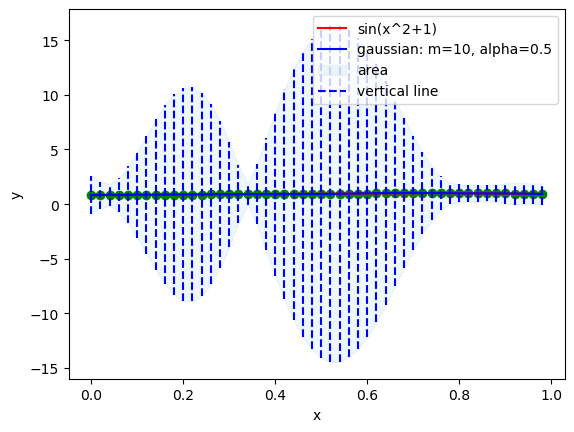

[39, 49, 44, 2, 42, 17]
6


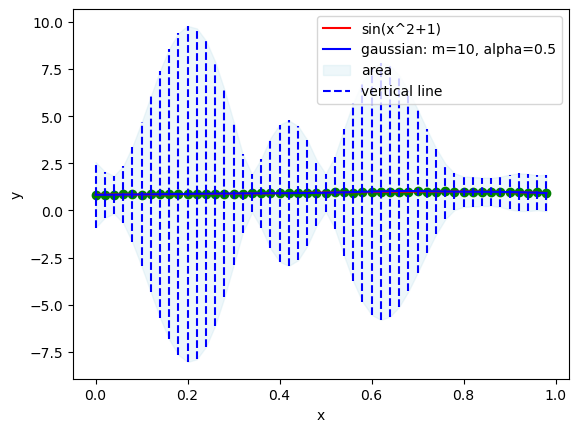

[39, 49, 44, 2, 42, 17, 25]
7


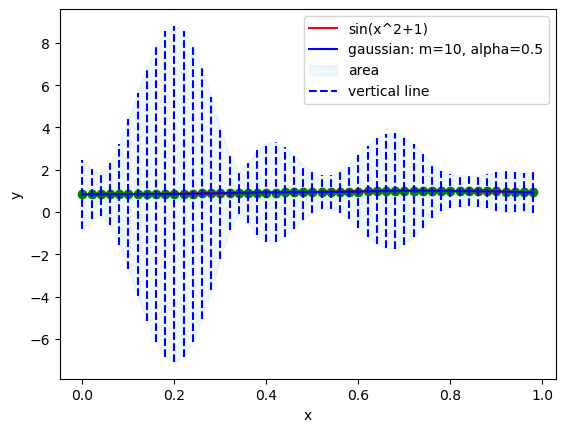

[39, 49, 44, 2, 42, 17, 25, 28]
8


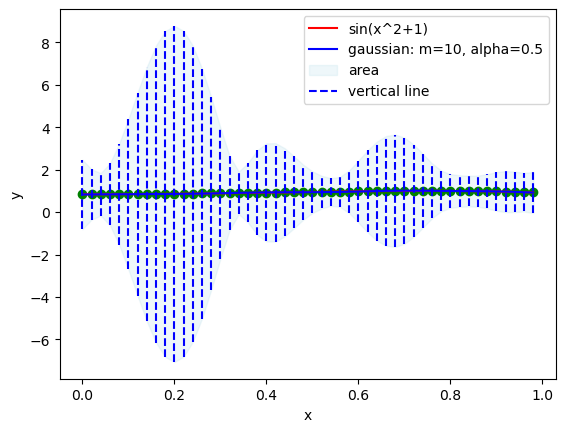

[39, 49, 44, 2, 42, 17, 25, 28, 28]
9


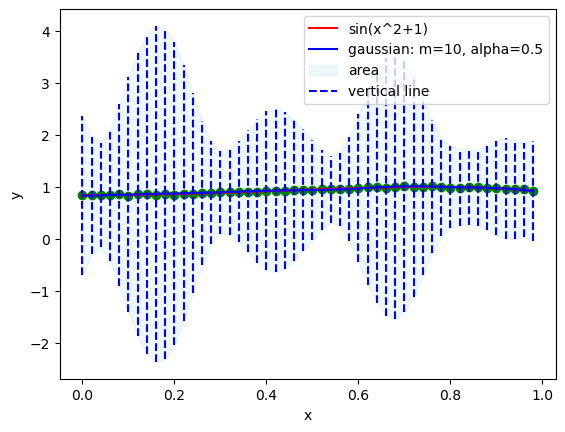

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14]
10


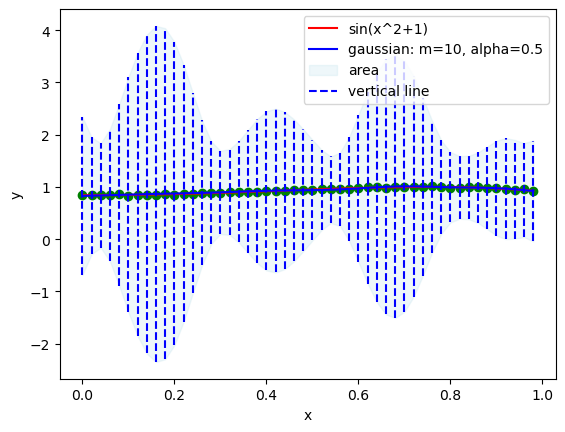

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41]
11


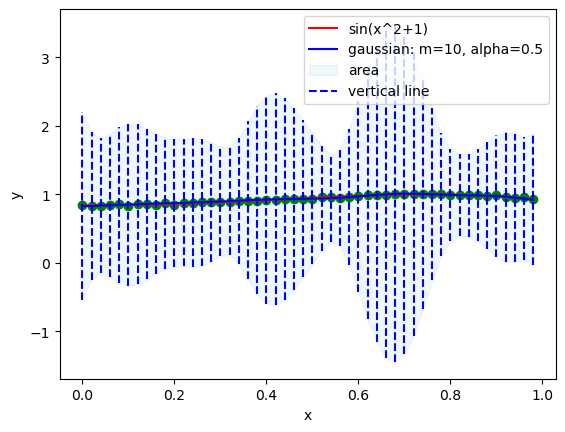

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9]
12


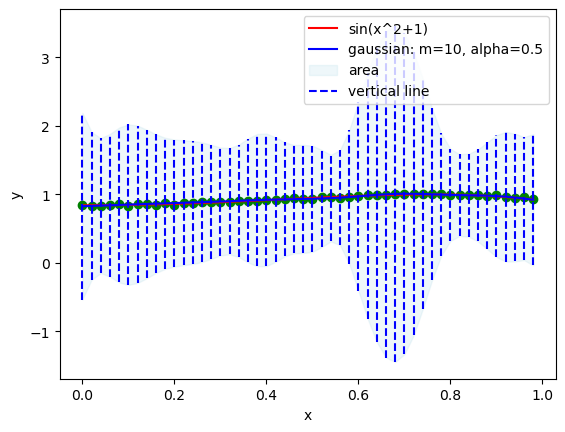

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22]
13


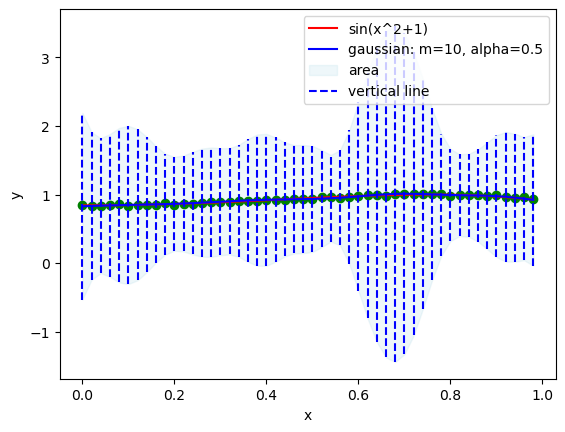

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10]
14


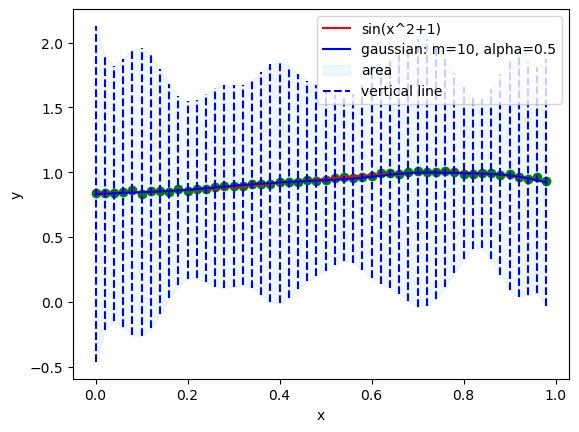

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33]
15


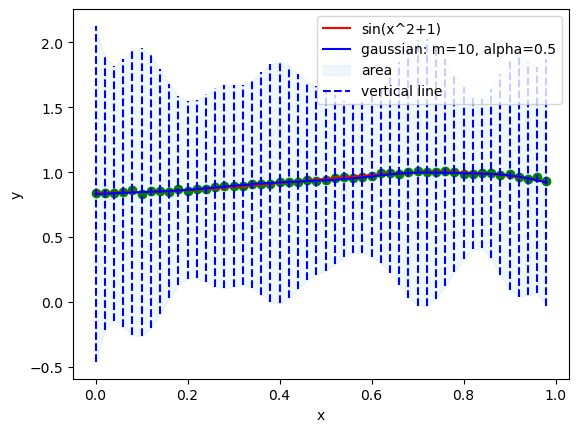

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30]
16


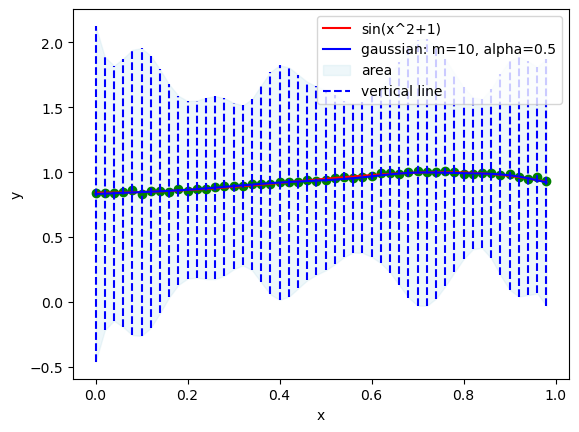

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16]
17


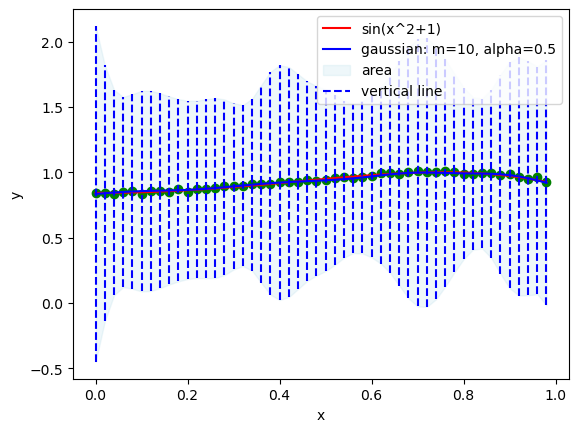

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4]
18


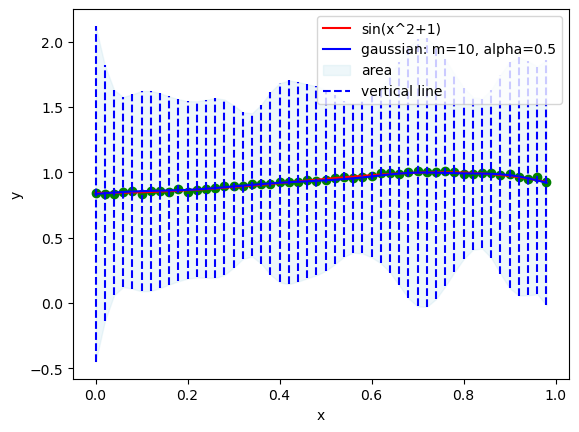

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18]
19


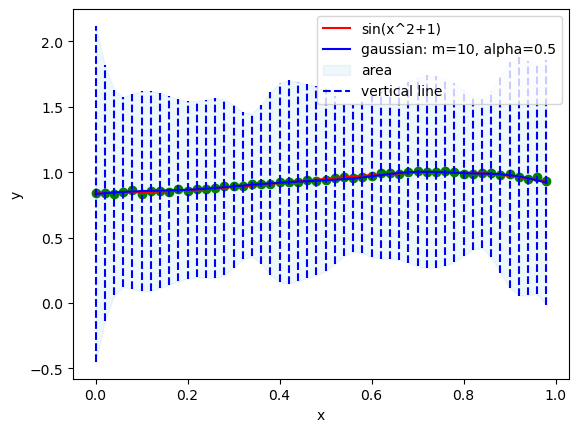

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35]
20


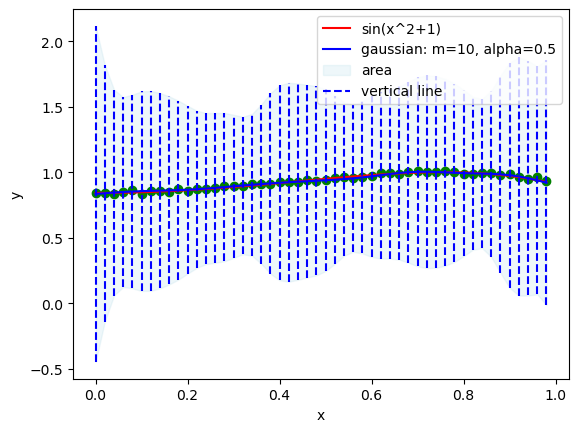

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13]
21


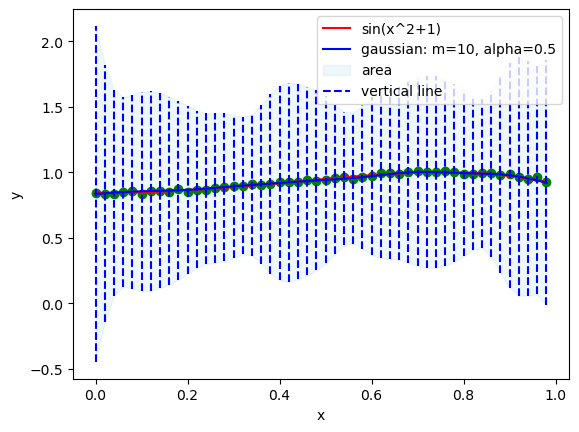

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27]
22


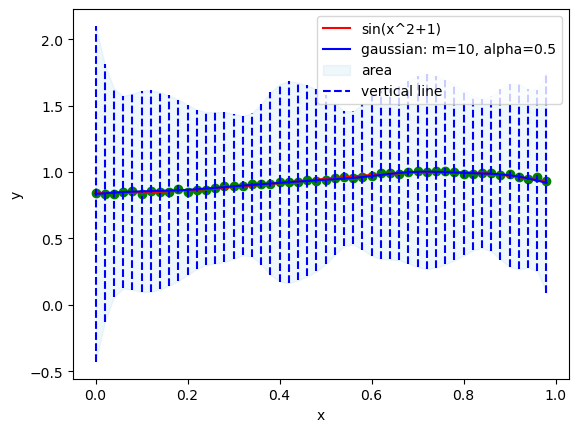

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47]
23


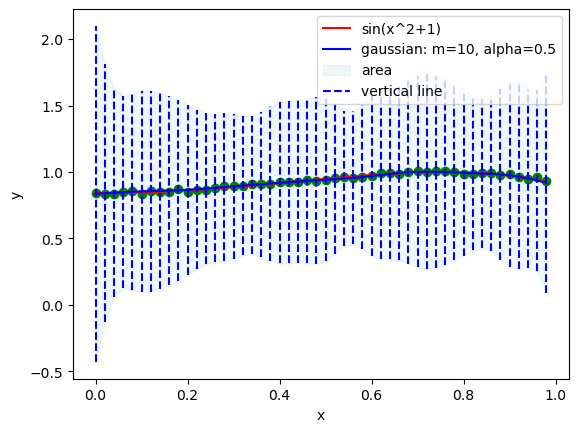

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21]
24


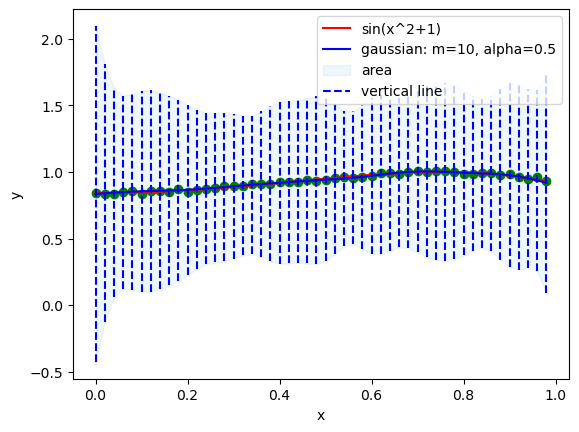

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34]
25


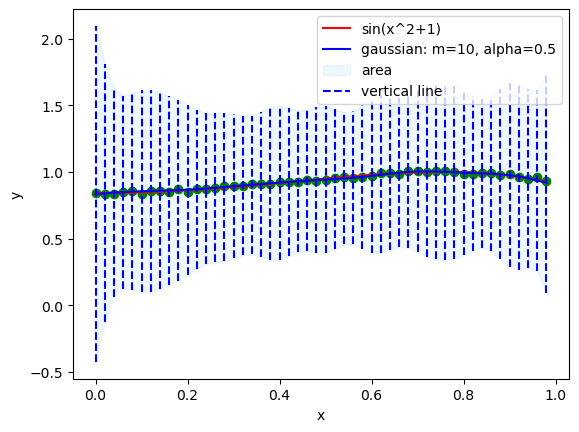

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23]
26


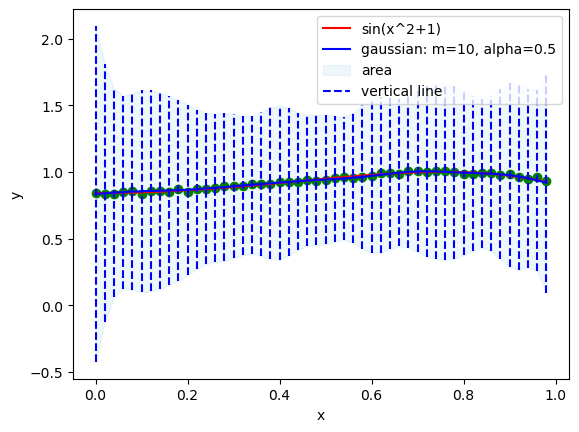

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25]
27


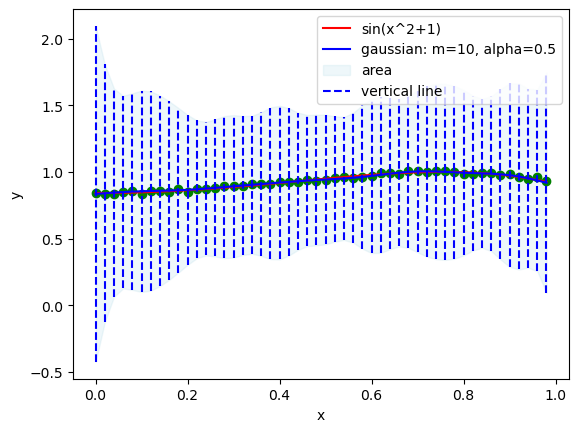

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11]
28


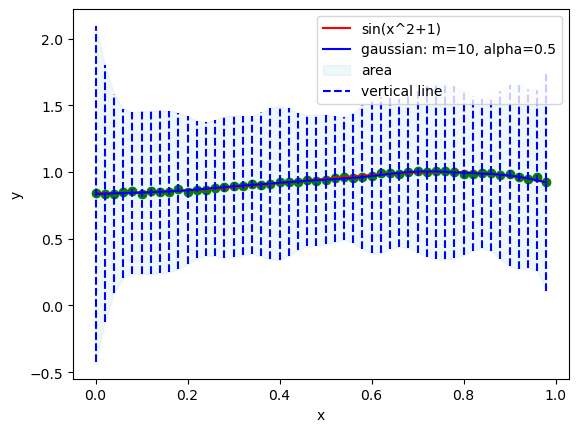

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5]
29


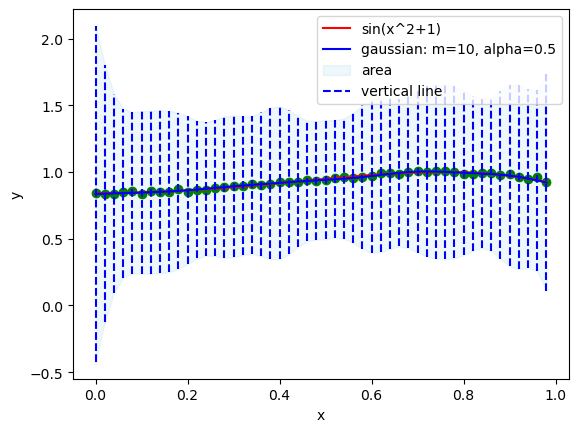

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24]
30


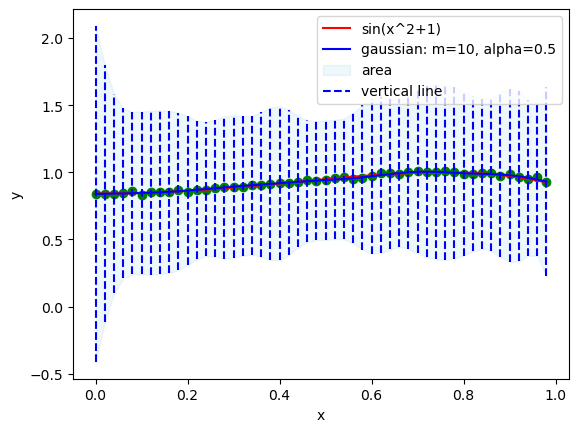

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48]
31


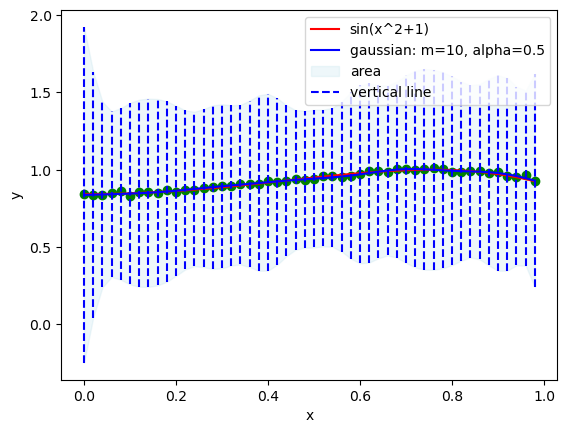

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2]
32


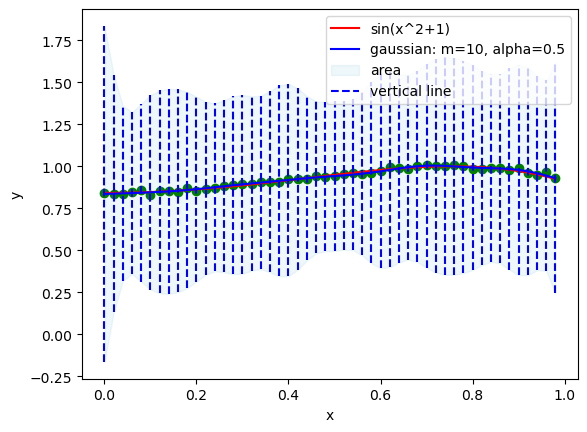

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2]
33


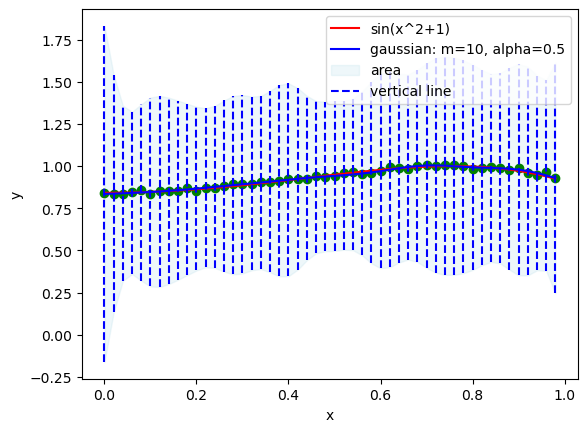

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9]
34


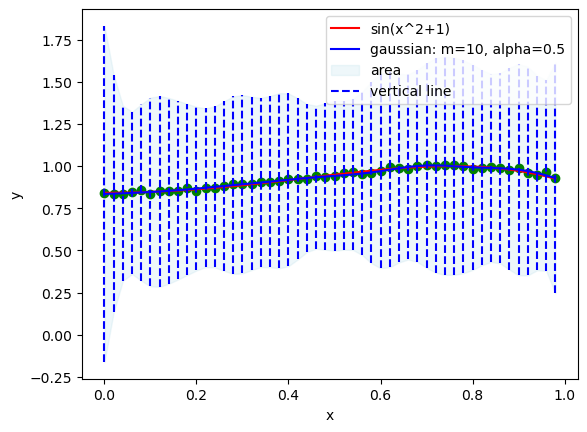

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21]
35


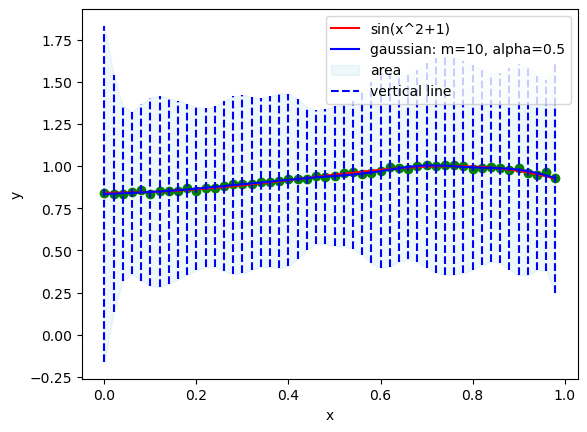

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24]
36


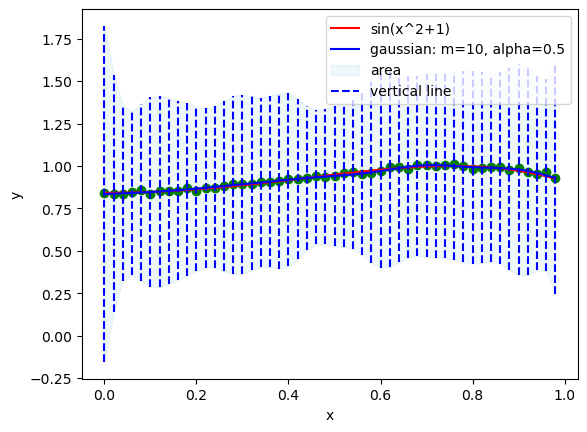

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37]
37


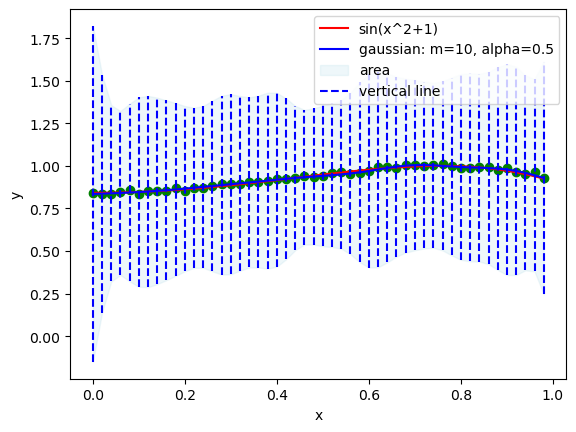

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37]
38


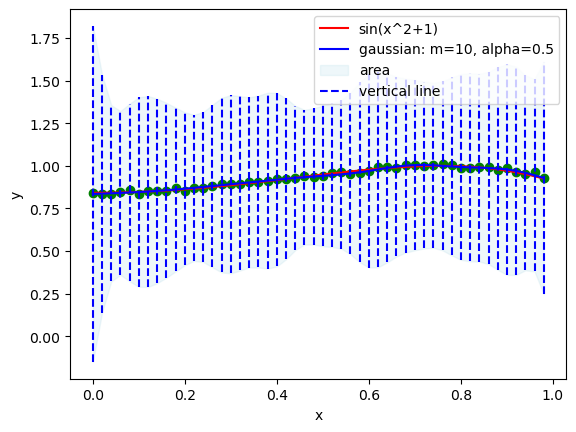

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11]
39


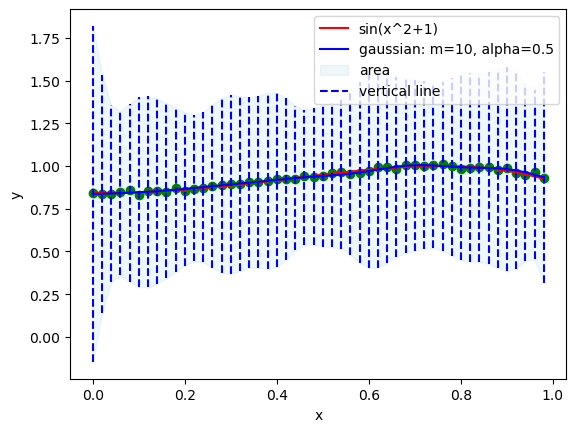

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48]
40


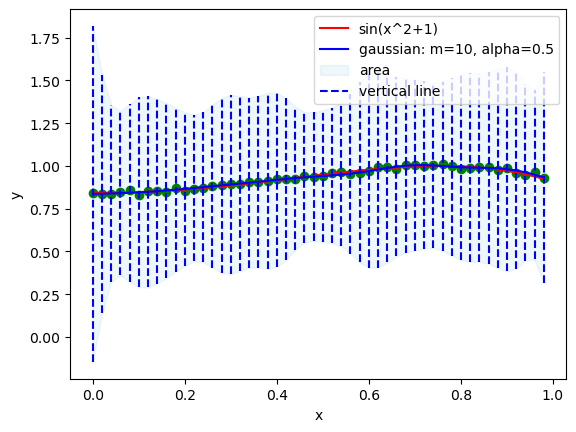

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25]
41


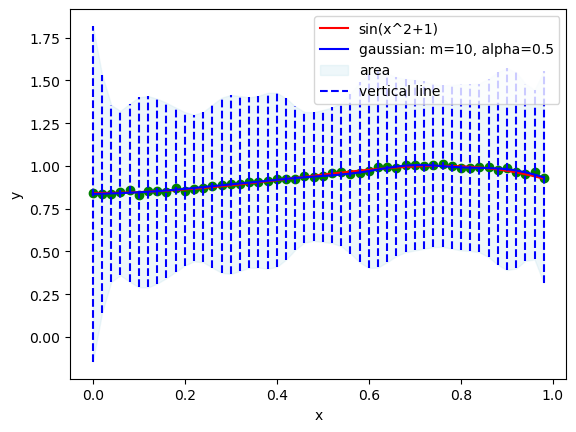

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41]
42


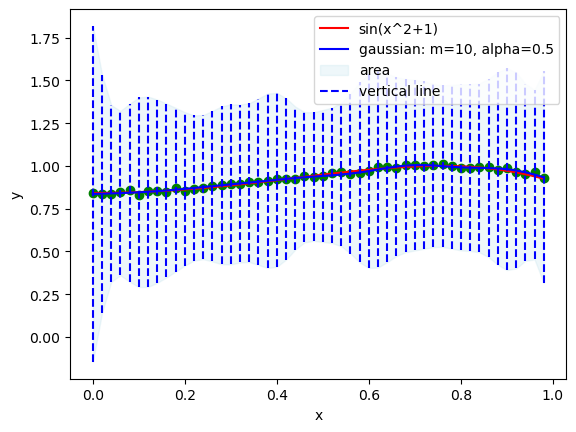

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15]
43


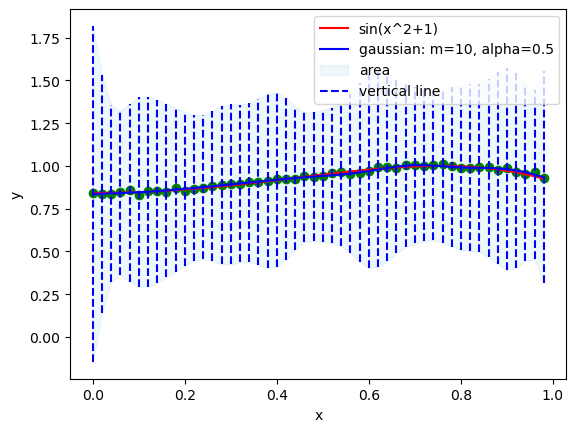

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15, 36]
44


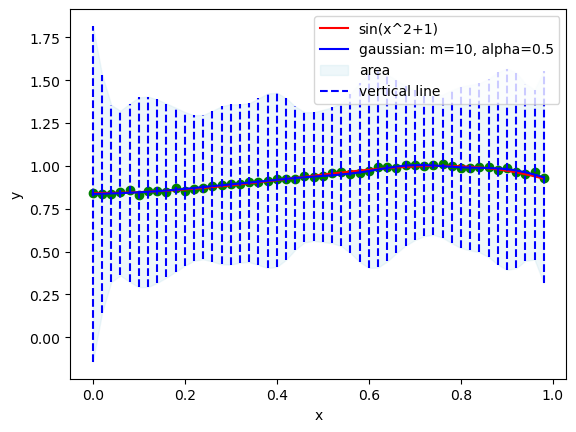

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15, 36, 37]
45


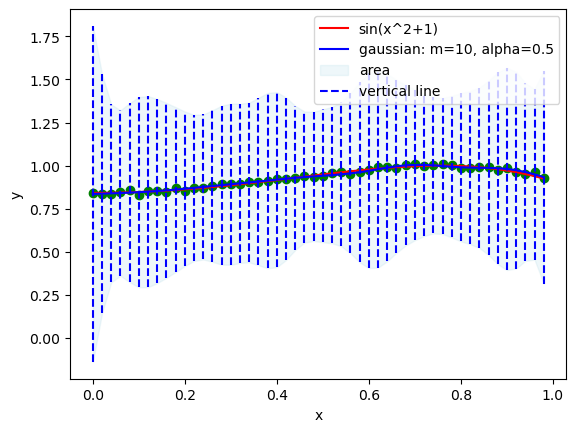

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15, 36, 37, 40]
46


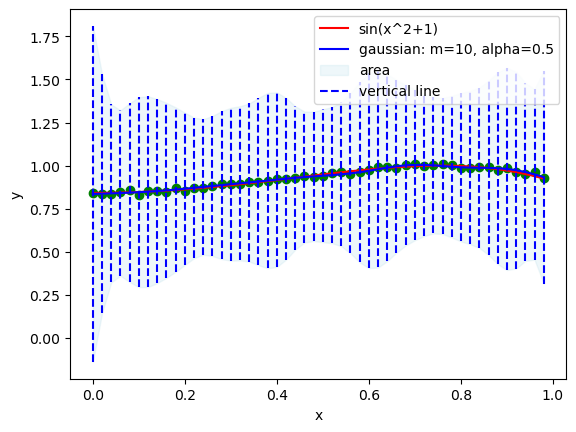

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15, 36, 37, 40, 13]
47


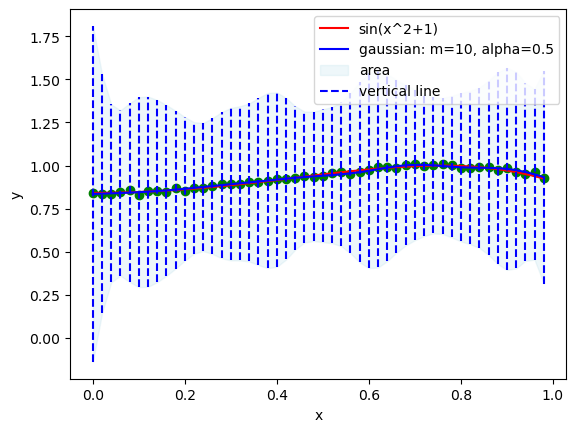

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15, 36, 37, 40, 13, 11]
48


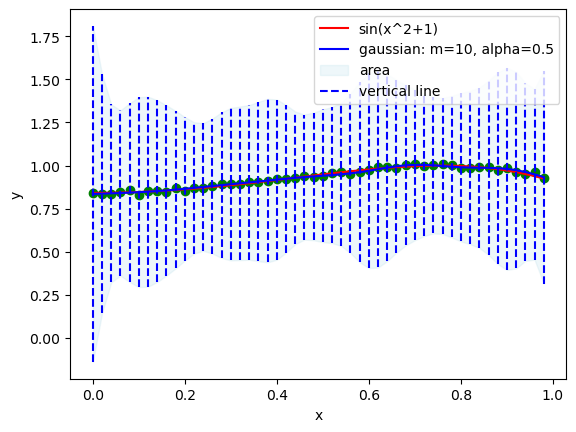

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15, 36, 37, 40, 13, 11, 21]
49


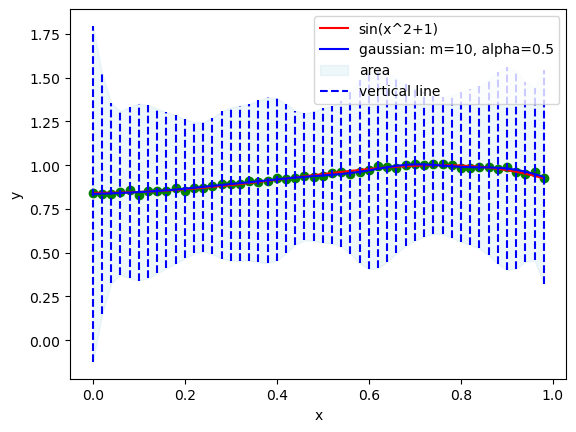

[39, 49, 44, 2, 42, 17, 25, 28, 28, 14, 41, 9, 22, 10, 33, 30, 16, 4, 18, 35, 13, 27, 47, 21, 34, 23, 25, 11, 5, 24, 48, 2, 2, 9, 21, 24, 37, 37, 11, 48, 25, 41, 15, 36, 37, 40, 13, 11, 21, 7]
50


In [8]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


i_arr = []
var_2 = 0.01
m = 10
alpha = 0.5
x, y_origin, y_noise, sub_y = get_data(nodes, mu, var_2, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var_2, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var_2, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var_2 + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)